In [2]:
import pandas as pd

In [172]:
df=pd.read_csv('ds/dataset.csv', encoding='utf-8')
df['GDate']=pd.to_datetime(df['GDate'],format="%Y%m%d")
df_min_max_scaled=df.iloc[1:1177,[3,4,5,6,7,8,9,10,11]].copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    


In [35]:
df.columns

Index(['LVal18AFC', 'PDate', 'GDate', 'NumberTrade', 'VolumeTrade', 'Value',
       'ClosePrice', 'LastPrice', 'PriceMin', 'PriceMax', 'PriceFirst',
       'PriceYesterday'],
      dtype='object')

In [174]:
data_x=df_min_max_scaled.to_numpy().reshape((147,8,9))
data_y=df_min_max_scaled.iloc[range(0,1176,8),[8]].to_numpy()

In [175]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=.1,random_state=4)
print(train_x.shape,train_y.shape)

(132, 8, 9) (132, 1)


In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [187]:
model = Sequential(name='mellat')
model.add(LSTM((3),return_sequences=True,batch_input_shape=(None,8,9)))
model.add(LSTM((1),return_sequences=False,batch_input_shape=(None,8,9)))
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])
model.summary()


Model: "mellat"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 8, 3)              156       
                                                                 
 lstm_9 (LSTM)               (None, 1)                 20        
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [188]:
history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=400,batch_size=10)

Epoch 1/400


14/14 [==============================] - 6s 96ms/step - loss: 0.0934 - accuracy: 0.0000e+00 - val_loss: 0.1527 - val_accuracy: 0.0000e+00
Epoch 2/400
14/14 [==============================] - 0s 13ms/step - loss: 0.0749 - accuracy: 0.0000e+00 - val_loss: 0.1348 - val_accuracy: 0.0000e+00
Epoch 3/400
14/14 [==============================] - 0s 14ms/step - loss: 0.0683 - accuracy: 0.0000e+00 - val_loss: 0.1218 - val_accuracy: 0.0000e+00
Epoch 4/400
14/14 [==============================] - 0s 12ms/step - loss: 0.0618 - accuracy: 0.0000e+00 - val_loss: 0.1112 - val_accuracy: 0.0000e+00
Epoch 5/400
14/14 [==============================] - 0s 14ms/step - loss: 0.0551 - accuracy: 0.0000e+00 - val_loss: 0.1028 - val_accuracy: 0.0000e+00
Epoch 6/400
14/14 [==============================] - 0s 11ms/step - loss: 0.0485 - accuracy: 0.0000e+00 - val_loss: 0.0960 - val_accuracy: 0.0000e+00
Epoch 7/400
14/14 [==============================] - 0s 13ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_lo

In [184]:
import matplotlib.pyplot as plt

1/1 [==============================] - 2s 2s/step
[[0.05626126]
 [0.12608574]
 [0.06507424]
 [0.32782808]
 [0.19524665]
 [0.14401083]
 [0.00361394]
 [0.00543418]
 [0.00325715]
 [0.68032503]
 [0.16584453]
 [0.05420408]
 [0.05626126]
 [0.12155078]
 [0.74969685]] [[0.05772379]
 [0.10939344]
 [0.06693828]
 [0.32958916]
 [0.20142406]
 [0.12843163]
 [0.00384571]
 [0.00525454]
 [0.00319842]
 [0.76377413]
 [0.14251989]
 [0.05338309]
 [0.05772379]
 [0.11472414]
 [0.77234132]]


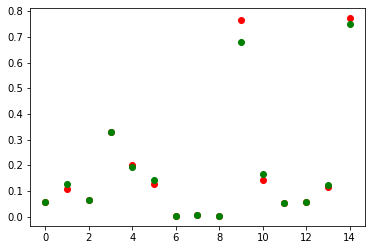

In [189]:
res=model.predict(test_x)
l=len(test_y)
plt.scatter(range(l),test_y,c='r')
plt.scatter(range(l),res,c='g')
# print(res,test_y)

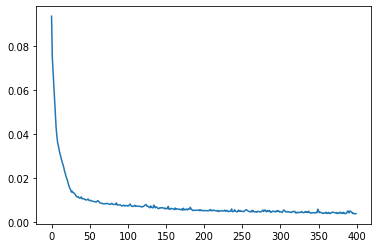

In [190]:
plt.plot(history.history['loss'])